In [1]:
import numpy as np
import pylab as plt

## First task

In [2]:
f1 = lambda x: x[0]**2 + x[1]**2
f2 = lambda x: x[0]**2 - x[1]**2

X = np.arange(-2, 2.1, 0.1)
Y = X.copy()
n = int(np.shape(X)[0])

fun1 = np.zeros((n, n))
fun2 = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        fun1[i, j] = f1([X[i], Y[j]])
        fun2[i, j] = f2([X[i], Y[j]])

gradx = np.gradient(fun1, X, axis=0)
grady = np.gradient(fun2, Y, axis=1)

div = gradx + grady

div_ = div[1:-1, 1:-1]

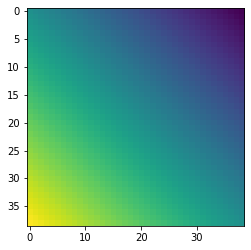

In [3]:
plt.imshow(div_)
plt.show()

In [4]:
an_di = lambda x: 2*x[0] - 2*x[1]

an_div = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        an_div[i, j] = an_di([X[i], Y[j]])
        
an_div_ = an_div[1:-1, 1:-1]

print(np.linalg.norm(an_div_ - div_))

5.048918491026602e-14


## Task 2

Analytical solution : https://www.wolframalpha.com/input?i2d=true&i=Integrate%5BDivide%5Bcos%5C%2840%29x%5C%2841%29%2C2+%2B+sin%5C%2840%29x%5C%2841%29%5D%2C%7Bx%2C2%2C8%7D%5D

Integral = log(2 + sin(8)) - log(2 + sin(2))≈0.027147

In [5]:
def rectangle(f, h):
    return h * sum(f[:-1])

def trapezoid(f, h):
    return 0.5 * h * (f[0] + 2 * sum(f[1:-1]) + f[-1])

def simpson(f, h):
    assert (len(f)-1) % 2 == 0
    return h/3. * (f[0] + 4 * sum(f[1:-1:2]) + \
                   2 * sum(f[2:-2:2]) + f[-1])

In [6]:
fun = lambda x: np.cos(x)/(2 + np.sin(x))
h = 6/12
x = np.linspace(2, 8, 13)
f = fun(x)
integ = 0.027147

int_r = rectangle(f, h)
int_t = trapezoid(f, h)
int_s = simpson(f, h)
print(int_r, int_t, int_s)

0.003549826088434384 0.027141739870062583 0.026102811853675204


Runge:

In [7]:
ps = [1,2,4]
h_ = 6/24
x_ = np.linspace(2, 8, 13)
f_ = fun(x_)

int_r_ = rectangle(f_, h_)
int_t_ = trapezoid(f_, h_)
int_s_ = simpson(f_, h_)
print(int_r_, int_t_, int_s_)

0.001774913044217192 0.013570869935031291 0.013051405926837602


In [8]:
dr = np.abs(int_r_ - int_r)/(2**ps[0] - 1)
dt = np.abs(int_t_ - int_t)/(2**ps[1] - 1)
ds = np.abs(int_s_ - int_s)/(2**ps[2] - 1)
print("Absolute errors is:")
print("Rectangle:", dr)
print("Trapezoid:", dt)
print("Simpson:", ds)

Absolute errors is:
Rectangle: 0.001774913044217192
Trapezoid: 0.004523623311677097
Simpson: 0.0008700937284558401


In [9]:
print("Relative errors is:")
print("Rectangle:", dr/integ)
print("Trapezoid:", dt/integ)
print("Simpson:", ds/integ)

Relative errors is:
Rectangle: 0.06538155391819324
Trapezoid: 0.16663437255229296
Simpson: 0.032051192708433346


a priori formula:

In [10]:
M1 = 2 # (using wolfram)
M2 = 2 # (using wolfram)
M4 = 70 # (using wolfram)

amb = 6

err = amb*h/2*M1
ert = amb*h**2/12*M2
ers = amb*h**4/180*M4
print("Absolute errors is:")
print("Rectangle:", err)
print("Trapezoid:", ert)
print("Simpson:", ers)
print("Relative errors is:")
print("Rectangle:", err/integ)
print("Trapezoid:", ert/integ)
print("Simpson:", ers/integ)

Absolute errors is:
Rectangle: 3.0
Trapezoid: 0.25
Simpson: 0.14583333333333334
Relative errors is:
Rectangle: 110.5094485578517
Trapezoid: 9.209120713154308
Simpson: 5.371987082673346


## Task 4

In [11]:
# Пример считывания из файла

norm = open('s27w1.eea')
inp = norm.readlines()
num_n = [float(k) for k in inp[:7680]  ]
norm.close()

shiz = open('454-1W.eea')
inp = shiz.readlines()
num_sh = [float(k) for k in inp[:7680]  ]
shiz.close()

N = 7680
SR = N
freq = np.fft.fftfreq(N, 1./SR)/60

/home/user/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/user/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


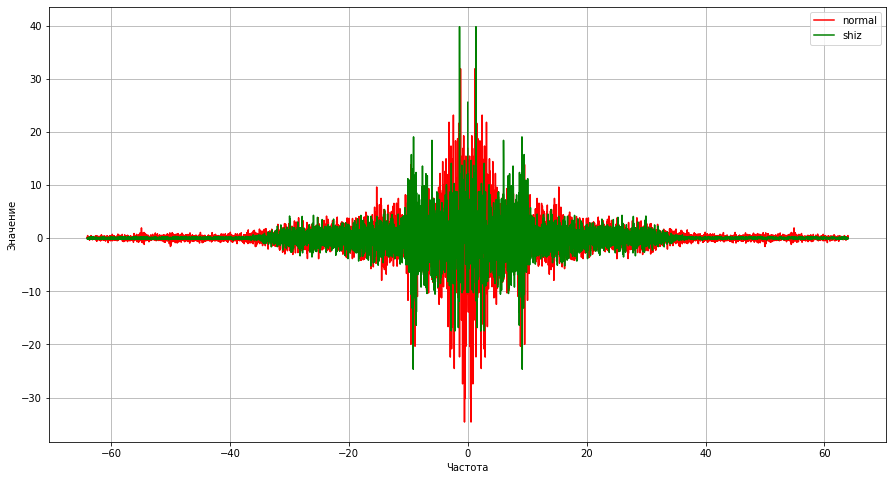

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

spectrum_n = np.fft.ifft(num_n)
spectrum_sh = np.fft.ifft(num_sh)

plt.plot(freq, spectrum_n, c="red", label="normal")
plt.plot(freq, spectrum_sh, c="green", label="shiz")
plt.legend()
plt.xlabel(u'Частота')
plt.ylabel(u'Значение')
plt.grid()
plt.show()

In [13]:
print("Normal maximum at frequency", freq[np.argmax(spectrum_n)])
print("Shiz maximum at frequency", freq[np.argmax(spectrum_sh)])

Normal maximum at frequency 1.2166666666666666
Shiz maximum at frequency 1.3833333333333333


In [14]:
h = 0.01666667

freqs = freq.copy()
freqs[freq < 8] = 0
freqs[freq > 13] = 0

fn = spectrum_n[np.argwhere(freqs > 0)]
fsh = spectrum_sh[np.argwhere(freqs > 0)]

Intn = simpson(np.real(fn), h)
Intsh = simpson(np.real(fsh), h)

print("Spectral power of the alpha rhythm signal for normal is", Intn)
print("Spectral power of the alpha rhythm signal for shiz is", Intsh)

Spectral power of the alpha rhythm signal for normal is [1.45801532]
Spectral power of the alpha rhythm signal for shiz is [1.96674641]


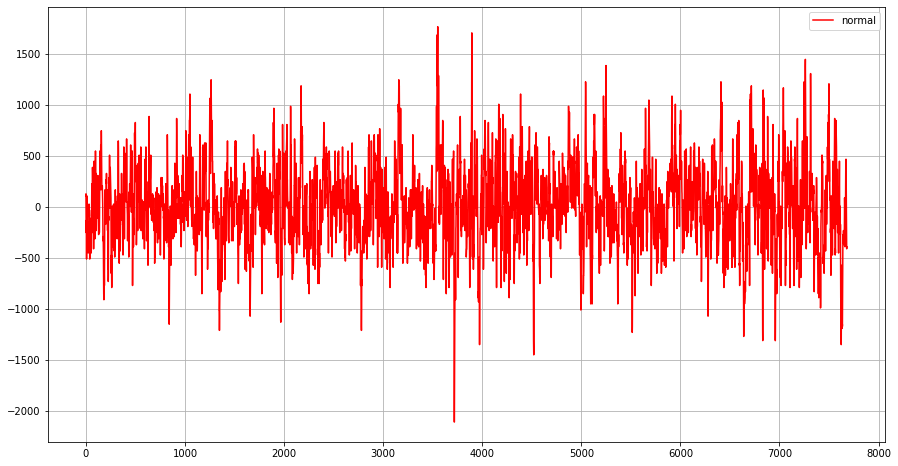

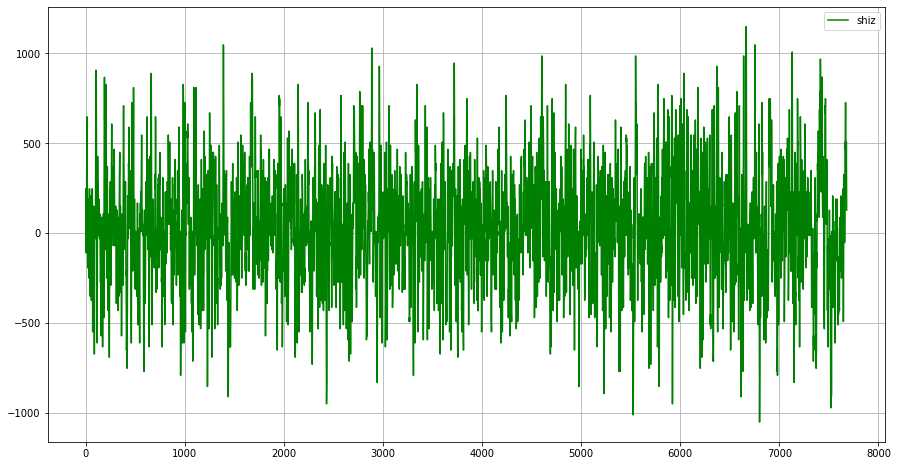

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

plt.plot(num_n, c="red", label="normal")
plt.legend()
plt.grid()
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(15, 8))

plt.plot(num_sh, c="green", label="shiz")
plt.legend()
plt.grid()
plt.show()

In [16]:
print("STD for normal is", np.std(num_n))
print("STD for shiz is", np.std(num_sh))

STD for normal is 383.59470069091276
STD for shiz is 305.6884626810746
